In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

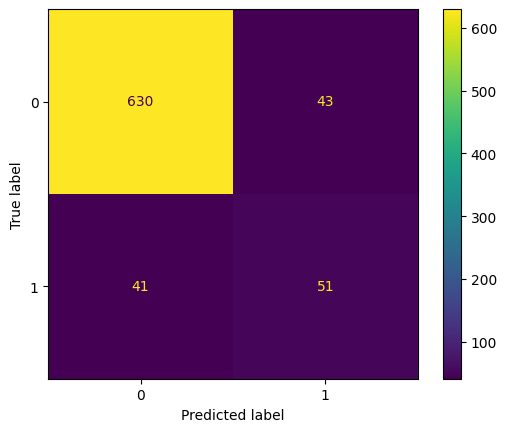

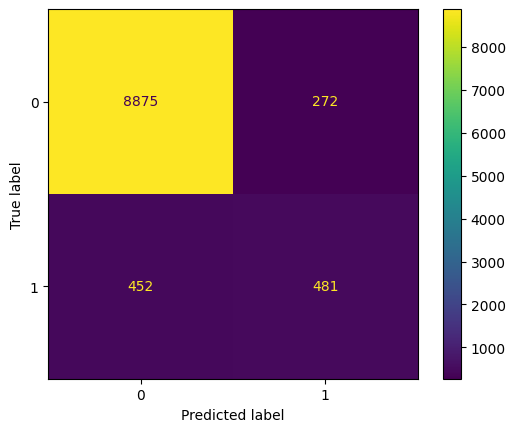

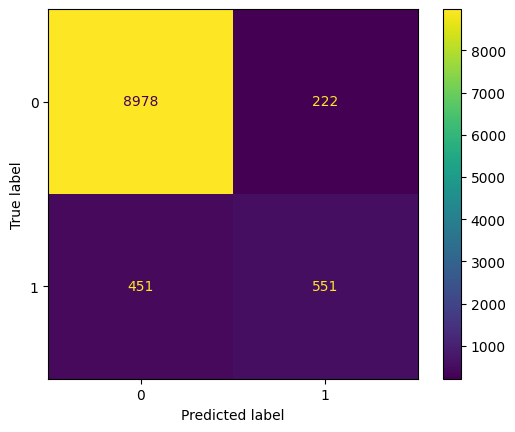

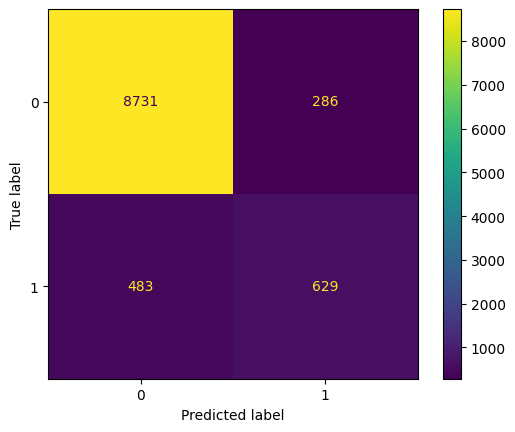

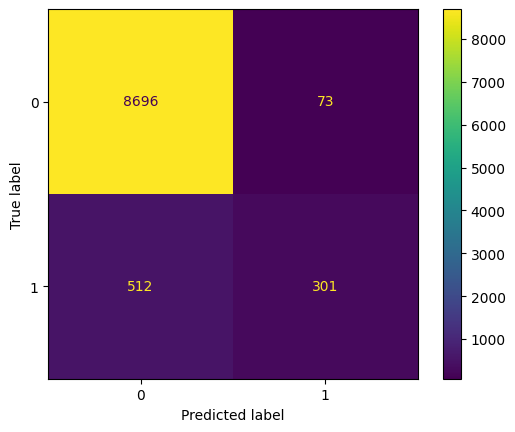

In [3]:
arquivos = os.listdir('Arquivos')
for arquivo in arquivos:
    if(arquivo.endswith(".pickle")):
        print(f'-----------{arquivo}-------------')
        file = open(r'Arquivos/' + arquivo , 'rb')
        X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(file)

        # Concatenando as bases de treino e validação
        X_train = np.vstack((X_train, X_val))
        y_train = np.vstack((y_train, y_val))

        # Tranformando em um problema de classificação binária
        y_train[y_train != 0] = 1
        y_val[y_val != 0] = 1
        y_test[y_test != 0] = 1

        # Gradient Boosting
        model = GradientBoostingClassifier()

        # Parametros do search
        parameters = {'n_estimators':[90, 100, 110]}

        clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
        clf.fit(X_train, y_train.ravel())

        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.show()